#3.1
The traveling Salesman Problem (TSP) is a combinatorial problem that deals with finding the shortest and most efficient route to follow for reaching a list of specific destinations.

It is a common algorithmic problem in the field of delivery operations that might hamper the multiple delivery process and result in financial loss. TSP turns out when you have multiple routes available but choosing a minimum cost path is really hard for you or a traveling person.

Best state: [ 2  3  1  5  4  7  6 10  8  9 11]
Best cost: 315.0


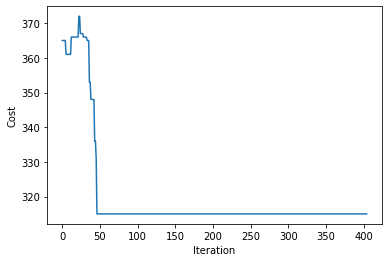

In [1]:
import numpy as np

# Load distance matrix from CSV file
distance_matrix = np.loadtxt(open("TSP11.csv", "rb"), delimiter=",")
def cost(tour):
    # Calculate the total distance travelled for a given tour
    distance = 0
    for i in range(len(tour)-1):
        distance += distance_matrix[tour[i], tour[i+1]]
    # Add the distance from the last city back to the first city
    distance += distance_matrix[tour[-1], tour[0]]
    return distance
def neighbour(tour):
    # Generate a random neighbouring tour by swapping two consecutive cities
    i = np.random.randint(len(tour)-1)
    new_tour = tour.copy()
    new_tour[i], new_tour[i+1] = new_tour[i+1], new_tour[i]
    return new_tour
def simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature):
    current_state = initial_state
    current_cost = cost(current_state)
    current_temperature = initial_temperature
    best_state = current_state
    best_cost = current_cost
    iteration = 0
    costs = []
    
    while current_temperature > stopping_temperature:
        iteration += 1
        
        # Generate a neighbouring state
        new_state = neighbour(current_state)
        new_cost = cost(new_state)
        
        # Calculate the acceptance probability
        acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)
        
        # Accept the new state with the acceptance probability
        if acceptance_prob > np.random.rand():
            current_state = new_state
            current_cost = new_cost
        
        # Update the best state if necessary
        if current_cost < best_cost:
            best_state = current_state+1
            best_cost = current_cost
            
        # Add the cost of the current state to the costs list
        costs.append(current_cost)
        
        # Decrease the temperature using the cooling schedule
        current_temperature = current_temperature * cooling_factor
        
    return best_state, best_cost, costs
# Define the initial state and parameters for the simulated annealing algorithm
initial_state = np.arange(distance_matrix.shape[0])
initial_temperature = 10
cooling_factor = 0.95
stopping_temperature = 1e-8

# Run the simulated annealing algorithm
best_state, best_cost, costs = simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature)

# Print the best state and cost
print("Best state:", best_state)
print("Best cost:", best_cost)

# Plot the cost function for each iteration
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

#3.6
The acceptance probability is given by $e^{−(c_1−c)/ T_k}$ where c1 and c are the cost of new state and the old state $T_k$ is the current temperature of the $k^{th}$ iterate. The behaviour of acceptance probability when \
1. the new cost is worse than the current cost, i.e., c1 > c, the acceptance probability decreases. This is because the exponent e^-(c1-c)/Tk becomes larger, making the acceptance probability smaller. As a result, the algorithm becomes less likely to accept the new state and more likely to stick with the current state.

2. As the temperature decreases, the acceptance probability also decreases. This is because the denominator Tk in e^-(c1-c)/Tk becomes smaller, making the entire expression in the exponent larger. As a result, the algorithm becomes less likely to accept new states at lower temperatures, and more likely to stick with the current state. 

best cost is best distance i.e. minimum distance

#3.8


Best state: [ 2  3  1  4  6  7  8  9 10  5 11]
Best cost: 353.0


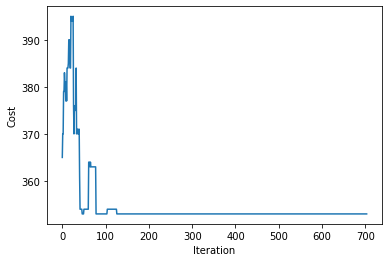

In [10]:
import numpy as np

# Load distance matrix from CSV file
distance_matrix = np.loadtxt(open("TSP11.csv", "rb"), delimiter=",")
def cost(tour):
    # Calculate the total distance travelled for a given tour
    distance = 0
    for i in range(len(tour)-1):
        distance += distance_matrix[tour[i], tour[i+1]]
    # Add the distance from the last city back to the first city
    distance += distance_matrix[tour[-1], tour[0]]
    return distance
def neighbour(tour):
    # Generate a random neighbouring tour by swapping two consecutive cities
    i = np.random.randint(len(tour)-1)
    new_tour = tour.copy()
    new_tour[i], new_tour[i+1] = new_tour[i+1], new_tour[i]
    return new_tour
def simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature):
    current_state = initial_state
    current_cost = cost(current_state)
    current_temperature = initial_temperature
    best_state = current_state
    best_cost = current_cost
    iteration = 0
    costs = []
    
    while current_temperature > stopping_temperature:
        iteration += 1
        
        # Generate a neighbouring state
        new_state = neighbour(current_state)
        new_cost = cost(new_state)
        
        # Calculate the acceptance probability
        acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)
        
        # Accept the new state with the acceptance probability
        if acceptance_prob > np.random.rand():
            current_state = new_state
            current_cost = new_cost
        
        # Update the best state if necessary
        if current_cost < best_cost:
            best_state = current_state+1
            best_cost = current_cost
            
        # Add the cost of the current state to the costs list
        costs.append(current_cost)
        
        # Decrease the temperature using the cooling schedule
        current_temperature = current_temperature * cooling_factor
        
    return best_state, best_cost, costs
# Define the initial state and parameters for the simulated annealing algorithm
initial_state = np.arange(distance_matrix.shape[0])
initial_temperature = 20
cooling_factor = 0.97
stopping_temperature = 1e-8

# Run the simulated annealing algorithm
best_state, best_cost, costs = simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature)

# Print the best state and cost
print("Best state:", best_state)
print("Best cost:", best_cost)

# Plot the cost function for each iteration
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

As we can see from the above results as we increase the value of initial temperature and alpha value the number of iterations to obtain the results increases and the minimum distance travelled by the salesman also increases

Best state: [ 1  2  3  5  4  7  6 10  8 11  9]
Best cost: 312.0


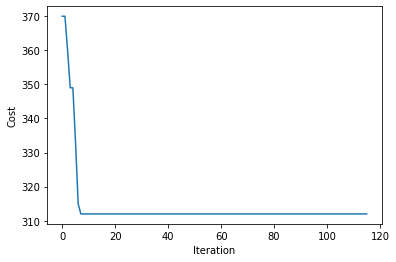

In [8]:
import numpy as np

# Load distance matrix from CSV file
distance_matrix = np.loadtxt(open("TSP11.csv", "rb"), delimiter=",")
def cost(tour):
    # Calculate the total distance travelled for a given tour
    distance = 0
    for i in range(len(tour)-1):
        distance += distance_matrix[tour[i], tour[i+1]]
    # Add the distance from the last city back to the first city
    distance += distance_matrix[tour[-1], tour[0]]
    return distance
def neighbour(tour):
    # Generate a random neighbouring tour by swapping two consecutive cities
    i = np.random.randint(len(tour)-1)
    new_tour = tour.copy()
    new_tour[i], new_tour[i+1] = new_tour[i+1], new_tour[i]
    return new_tour
def simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature):
    current_state = initial_state
    current_cost = cost(current_state)
    current_temperature = initial_temperature
    best_state = current_state
    best_cost = current_cost
    iteration = 0
    costs = []
    
    while current_temperature > stopping_temperature:
        iteration += 1
        
        # Generate a neighbouring state
        new_state = neighbour(current_state)
        new_cost = cost(new_state)
        
        # Calculate the acceptance probability
        acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)
        
        # Accept the new state with the acceptance probability
        if acceptance_prob > np.random.rand():
            current_state = new_state
            current_cost = new_cost
        
        # Update the best state if necessary
        if current_cost < best_cost:
            best_state = current_state+1
            best_cost = current_cost
            
        # Add the cost of the current state to the costs list
        costs.append(current_cost)
        
        # Decrease the temperature using the cooling schedule
        current_temperature = current_temperature * cooling_factor
        
    return best_state, best_cost, costs
# Define the initial state and parameters for the simulated annealing algorithm
initial_state = np.arange(distance_matrix.shape[0])
initial_temperature = 1.5
cooling_factor = 0.85
stopping_temperature = 1e-8

# Run the simulated annealing algorithm
best_state, best_cost, costs = simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature)

# Print the best state and cost
print("Best state:", best_state)
print("Best cost:", best_cost)

# Plot the cost function for each iteration
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

When we decrease the initial temperature value and alpha value the number of iterations required to obtain the optimal solutions decreases drastically while the optimal value of distance travelled also decreases

#3.9

Best state: [ 2  3  1  4  5  6  7  8  9 10 11]
Best cost: 361.0


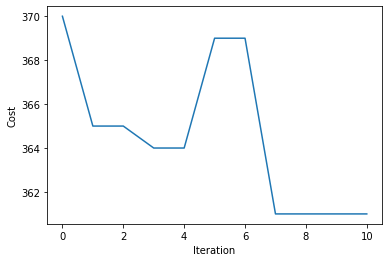

In [12]:
import numpy as np

# Load distance matrix from CSV file
distance_matrix = np.loadtxt(open("TSP11.csv", "rb"), delimiter=",")
def cost(tour):
    # Calculate the total distance travelled for a given tour
    distance = 0
    for i in range(len(tour)-1):
        distance += distance_matrix[tour[i], tour[i+1]]
    # Add the distance from the last city back to the first city
    distance += distance_matrix[tour[-1], tour[0]]
    return distance
def neighbour(tour):
    # Generate a random neighbouring tour by swapping two consecutive cities
    i = np.random.randint(len(tour)-1)
    new_tour = tour.copy()
    new_tour[i], new_tour[i+1] = new_tour[i+1], new_tour[i]
    return new_tour
def simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature):
    current_state = initial_state
    current_cost = cost(current_state)
    current_temperature = initial_temperature
    best_state = current_state
    best_cost = current_cost
    iteration = 0
    costs = []
    
    while current_temperature > stopping_temperature:
        iteration += 1
        
        # Generate a neighbouring state
        new_state = neighbour(current_state)
        new_cost = cost(new_state)
        
        # Calculate the acceptance probability
        acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)
        
        # Accept the new state with the acceptance probability
        if acceptance_prob > np.random.rand():
            current_state = new_state
            current_cost = new_cost
        
        # Update the best state if necessary
        if current_cost < best_cost:
            best_state = current_state+1
            best_cost = current_cost
            
        # Add the cost of the current state to the costs list
        costs.append(current_cost)
        
        # Decrease the temperature using the cooling schedule
        current_temperature = current_temperature - cooling_factor
        
    return best_state, best_cost, costs
# Define the initial state and parameters for the simulated annealing algorithm
initial_state = np.arange(distance_matrix.shape[0])
initial_temperature = 10
cooling_factor = 0.95
stopping_temperature = 1e-8

# Run the simulated annealing algorithm
best_state, best_cost, costs = simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature)

# Print the best state and cost
print("Best state:", best_state)
print("Best cost:", best_cost)

# Plot the cost function for each iteration
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

The update rule for the temperature is $T_k$=$T_k$-alpha.
The observations from this change is that the number of iterations required to reach the optimal value is quite small but the optimal value obtained is greater than that obtained in the previous case which can suggest that in this case algorithm was stuck at a local optima

#3.10

<ipython-input-4-59911d45a853>:36: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)


Best state: [ 2  1  3  4  5  6  7  9  8 10 11 12 13 14 16 15 18 19 17 20 21 23 22 26
 24 25 28 27 30 31 33 32 35 29 34 36 37 38 40 41 42 39 43 44 46 47 48 45]
Best cost: 112397.0


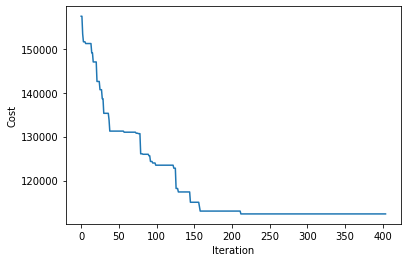

In [4]:
import numpy as np

# Load distance matrix from CSV file
distance_matrix = np.loadtxt(open("TSP48.csv", "rb"), delimiter=",")
def cost(tour):
    # Calculate the total distance travelled for a given tour
    distance = 0
    for i in range(len(tour)-1):
        distance += distance_matrix[tour[i], tour[i+1]]
    # Add the distance from the last city back to the first city
    distance += distance_matrix[tour[-1], tour[0]]
    return distance
def neighbour(tour):
    # Generate a random neighbouring tour by swapping two consecutive cities
    i = np.random.randint(len(tour)-1)
    new_tour = tour.copy()
    new_tour[i], new_tour[i+1] = new_tour[i+1], new_tour[i]
    return new_tour
def simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature):
    current_state = initial_state
    current_cost = cost(current_state)
    current_temperature = initial_temperature
    best_state = current_state
    best_cost = current_cost
    iteration = 0
    costs = []
    
    while current_temperature > stopping_temperature:
        iteration += 1
        
        # Generate a neighbouring state
        new_state = neighbour(current_state)
        new_cost = cost(new_state)
        
        # Calculate the acceptance probability
        acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)
        
        # Accept the new state with the acceptance probability
        if acceptance_prob > np.random.rand():
            current_state = new_state
            current_cost = new_cost
        
        # Update the best state if necessary
        if current_cost < best_cost:
            best_state = current_state+1
            best_cost = current_cost
            
        # Add the cost of the current state to the costs list
        costs.append(current_cost)
        
        # Decrease the temperature using the cooling schedule
        current_temperature = current_temperature * cooling_factor
        
    return best_state, best_cost, costs
# Define the initial state and parameters for the simulated annealing algorithm
initial_state = np.arange(distance_matrix.shape[0])
initial_temperature = 10
cooling_factor = 0.95
stopping_temperature = 1e-8

# Run the simulated annealing algorithm
best_state, best_cost, costs = simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature)

# Print the best state and cost
print("Best state:", best_state)
print("Best cost:", best_cost)

# Plot the cost function for each iteration
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

Best state: [ 1  2  4  5  3  6  7  9  8 10 11 12 13 14 16 15 17 19 18 20 21 23 22 26
 24 25 30 27 28 32 29 33 31 34 35 37 36 38 40 39 45 42 41 44 43 46 47 48]
Best cost: 121044.0


<ipython-input-13-61578ae88fec>:36: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)


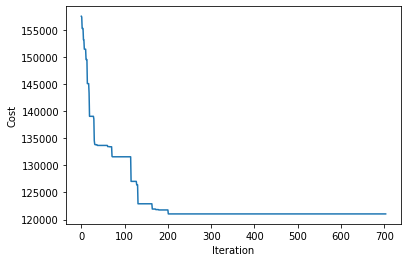

In [13]:
import numpy as np

# Load distance matrix from CSV file
distance_matrix = np.loadtxt(open("TSP48.csv", "rb"), delimiter=",")
def cost(tour):
    # Calculate the total distance travelled for a given tour
    distance = 0
    for i in range(len(tour)-1):
        distance += distance_matrix[tour[i], tour[i+1]]
    # Add the distance from the last city back to the first city
    distance += distance_matrix[tour[-1], tour[0]]
    return distance
def neighbour(tour):
    # Generate a random neighbouring tour by swapping two consecutive cities
    i = np.random.randint(len(tour)-1)
    new_tour = tour.copy()
    new_tour[i], new_tour[i+1] = new_tour[i+1], new_tour[i]
    return new_tour
def simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature):
    current_state = initial_state
    current_cost = cost(current_state)
    current_temperature = initial_temperature
    best_state = current_state
    best_cost = current_cost
    iteration = 0
    costs = []
    
    while current_temperature > stopping_temperature:
        iteration += 1
        
        # Generate a neighbouring state
        new_state = neighbour(current_state)
        new_cost = cost(new_state)
        
        # Calculate the acceptance probability
        acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)
        
        # Accept the new state with the acceptance probability
        if acceptance_prob > np.random.rand():
            current_state = new_state
            current_cost = new_cost
        
        # Update the best state if necessary
        if current_cost < best_cost:
            best_state = current_state+1
            best_cost = current_cost
            
        # Add the cost of the current state to the costs list
        costs.append(current_cost)
        
        # Decrease the temperature using the cooling schedule
        current_temperature = current_temperature * cooling_factor
        
    return best_state, best_cost, costs
# Define the initial state and parameters for the simulated annealing algorithm
initial_state = np.arange(distance_matrix.shape[0])
initial_temperature = 20
cooling_factor = 0.97
stopping_temperature = 1e-8

# Run the simulated annealing algorithm
best_state, best_cost, costs = simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature)

# Print the best state and cost
print("Best state:", best_state)
print("Best cost:", best_cost)

# Plot the cost function for each iteration
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

As we can see from the above results as we increase the value of initial temperature and alpha value the number of iterations to obtain the results increases and the minimum distance travelled by the salesman also increases

Best state: [ 1  2  4  5  3  6  7  9  8 10 11 12 13 14 16 15 18 17 19 20 21 23 22 26
 24 25 27 28 31 29 32 30 33 34 35 37 36 38 40 41 39 42 43 44 46 48 45 47]
Best cost: 125684.0


<ipython-input-21-63504d209a46>:36: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)


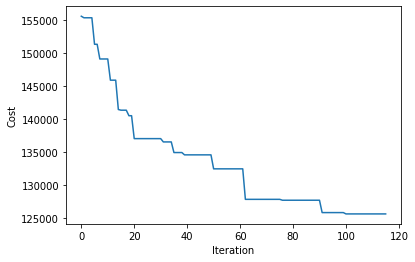

In [21]:
import numpy as np

# Load distance matrix from CSV file
distance_matrix = np.loadtxt(open("TSP48.csv", "rb"), delimiter=",")
def cost(tour):
    # Calculate the total distance travelled for a given tour
    distance = 0
    for i in range(len(tour)-1):
        distance += distance_matrix[tour[i], tour[i+1]]
    # Add the distance from the last city back to the first city
    distance += distance_matrix[tour[-1], tour[0]]
    return distance
def neighbour(tour):
    # Generate a random neighbouring tour by swapping two consecutive cities
    i = np.random.randint(len(tour)-1)
    new_tour = tour.copy()
    new_tour[i], new_tour[i+1] = new_tour[i+1], new_tour[i]
    return new_tour
def simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature):
    current_state = initial_state
    current_cost = cost(current_state)
    current_temperature = initial_temperature
    best_state = current_state
    best_cost = current_cost
    iteration = 0
    costs = []
    
    while current_temperature > stopping_temperature:
        iteration += 1
        
        # Generate a neighbouring state
        new_state = neighbour(current_state)
        new_cost = cost(new_state)
        
        # Calculate the acceptance probability
        acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)
        
        # Accept the new state with the acceptance probability
        if acceptance_prob > np.random.rand():
            current_state = new_state
            current_cost = new_cost
        
        # Update the best state if necessary
        if current_cost < best_cost:
            best_state = current_state+1
            best_cost = current_cost
            
        # Add the cost of the current state to the costs list
        costs.append(current_cost)
        
        # Decrease the temperature using the cooling schedule
        current_temperature = current_temperature * cooling_factor
        
    return best_state, best_cost, costs
# Define the initial state and parameters for the simulated annealing algorithm
initial_state = np.arange(distance_matrix.shape[0])
initial_temperature = 1.5
cooling_factor = 0.85
stopping_temperature = 1e-8

# Run the simulated annealing algorithm
best_state, best_cost, costs = simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature)

# Print the best state and cost
print("Best state:", best_state)
print("Best cost:", best_cost)

# Plot the cost function for each iteration
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

When we decrease the initial temperature value and alpha value the number of iterations required to obtain the optimal solutions decreases drastically while the optimal value of distance travelled does not decrease here

<ipython-input-5-138891d05850>:36: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)


Best state: [ 1  3  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 30 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 46 48]
Best cost: 148268.0


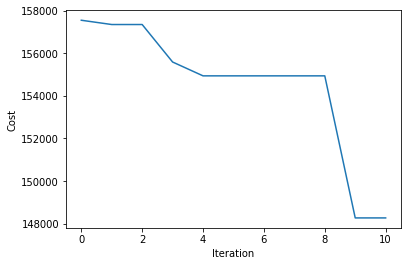

In [5]:
import numpy as np

# Load distance matrix from CSV file
distance_matrix = np.loadtxt(open("TSP48.csv", "rb"), delimiter=",")
def cost(tour):
    # Calculate the total distance travelled for a given tour
    distance = 0
    for i in range(len(tour)-1):
        distance += distance_matrix[tour[i], tour[i+1]]
    # Add the distance from the last city back to the first city
    distance += distance_matrix[tour[-1], tour[0]]
    return distance
def neighbour(tour):
    # Generate a random neighbouring tour by swapping two consecutive cities
    i = np.random.randint(len(tour)-1)
    new_tour = tour.copy()
    new_tour[i], new_tour[i+1] = new_tour[i+1], new_tour[i]
    return new_tour
def simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature):
    current_state = initial_state
    current_cost = cost(current_state)
    current_temperature = initial_temperature
    best_state = current_state
    best_cost = current_cost
    iteration = 0
    costs = []
    
    while current_temperature > stopping_temperature:
        iteration += 1
        
        # Generate a neighbouring state
        new_state = neighbour(current_state)
        new_cost = cost(new_state)
        
        # Calculate the acceptance probability
        acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)
        
        # Accept the new state with the acceptance probability
        if acceptance_prob > np.random.rand():
            current_state = new_state
            current_cost = new_cost
        
        # Update the best state if necessary
        if current_cost < best_cost:
            best_state = current_state+1
            best_cost = current_cost
            
        # Add the cost of the current state to the costs list
        costs.append(current_cost)
        
        # Decrease the temperature using the cooling schedule
        current_temperature = current_temperature - cooling_factor
        
    return best_state, best_cost, costs
# Define the initial state and parameters for the simulated annealing algorithm
initial_state = np.arange(distance_matrix.shape[0])
initial_temperature = 10
cooling_factor = 0.95
stopping_temperature = 1e-8

# Run the simulated annealing algorithm
best_state, best_cost, costs = simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature)

# Print the best state and cost
print("Best state:", best_state)
print("Best cost:", best_cost)

# Plot the cost function for each iteration
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

The update rule for the temperature is $T_k$=$T_k$-alpha.
The observations from this change is that the number of iterations required to reach the optimal value is quite small but the optimal value obtained is greater than that obtained in the previous case which can suggest that in this case algorithm was stuck at a local optima